In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from model import *

import re
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\wlyip\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# config
height, width, depth = 96, 96, 3
save_path = 'model/first_model.model'

In [3]:
# load dataset
image_list, label_list, num_classes = load_dataset('simpsons_images', height, width, 300)

In [4]:
# label encoder
le = LabelEncoder()
label_list = le.fit_transform(label_list)

# save label encoder as npy
np.save('classes.npy', le.classes_)

In [5]:
# split into train, dev sets
X_train, X_dev, y_train, y_dev = train_test_split(np.array(image_list), label_list, 
                                                  test_size=0.2, stratify=label_list)

In [6]:
# convert to one-hot vectors
y_train = np_utils.to_categorical(y_train)
y_dev = np_utils.to_categorical(y_dev)

In [14]:
# model 2
model = build_model_2(height, width, depth, num_classes)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
__________

In [89]:
model, history = train_model(model, 200, save_path, X_train, y_train, 
                             X_dev, y_dev, data_augmentation=True)

Epoch 1/200
483/482 [==============================] - 101s 210ms/step - loss: 2.5077 - acc: 0.2844 - val_loss: 1.9627 - val_acc: 0.4354

Epoch 00001: val_loss improved from inf to 1.96265, saving model to model/second_model.model
Epoch 2/200
483/482 [==============================] - 97s 201ms/step - loss: 1.4696 - acc: 0.5598 - val_loss: 1.3683 - val_acc: 0.6009

Epoch 00002: val_loss improved from 1.96265 to 1.36827, saving model to model/second_model.model
Epoch 3/200
483/482 [==============================] - 98s 203ms/step - loss: 1.0527 - acc: 0.6844 - val_loss: 1.6815 - val_acc: 0.5747

Epoch 00003: val_loss did not improve from 1.36827
Epoch 4/200
483/482 [==============================] - 99s 204ms/step - loss: 0.8584 - acc: 0.7427 - val_loss: 1.1745 - val_acc: 0.6623

Epoch 00004: val_loss improved from 1.36827 to 1.17450, saving model to model/second_model.model
Epoch 5/200
483/482 [==============================] - 97s 201ms/step - loss: 0.7294 - acc: 0.7845 - val_loss: 0.

Epoch 40/200
483/482 [==============================] - 95s 197ms/step - loss: 0.0721 - acc: 0.9787 - val_loss: 0.1913 - val_acc: 0.9523

Epoch 00040: val_loss improved from 0.19150 to 0.19129, saving model to model/second_model.model
Epoch 41/200
483/482 [==============================] - 96s 199ms/step - loss: 0.0715 - acc: 0.9780 - val_loss: 0.1929 - val_acc: 0.9542

Epoch 00041: val_loss did not improve from 0.19129
Epoch 42/200
483/482 [==============================] - 96s 199ms/step - loss: 0.0655 - acc: 0.9804 - val_loss: 0.2042 - val_acc: 0.9529

Epoch 00042: val_loss did not improve from 0.19129
Epoch 43/200
483/482 [==============================] - 96s 199ms/step - loss: 0.0640 - acc: 0.9798 - val_loss: 0.2043 - val_acc: 0.9516

Epoch 00043: val_loss did not improve from 0.19129
Epoch 44/200
483/482 [==============================] - 96s 199ms/step - loss: 0.0748 - acc: 0.9766 - val_loss: 0.2107 - val_acc: 0.9523

Epoch 00044: val_loss did not improve from 0.19129
Epoch 45/

483/482 [==============================] - 95s 197ms/step - loss: 0.0116 - acc: 0.9965 - val_loss: 0.1872 - val_acc: 0.9663

Epoch 00080: val_loss did not improve from 0.16955
Epoch 81/200
483/482 [==============================] - 96s 199ms/step - loss: 0.0099 - acc: 0.9972 - val_loss: 0.1746 - val_acc: 0.9666

Epoch 00081: val_loss did not improve from 0.16955
Epoch 82/200
483/482 [==============================] - 95s 197ms/step - loss: 0.0136 - acc: 0.9959 - val_loss: 0.1768 - val_acc: 0.9635

Epoch 00082: val_loss did not improve from 0.16955
Epoch 83/200
483/482 [==============================] - 95s 196ms/step - loss: 0.0115 - acc: 0.9962 - val_loss: 0.1773 - val_acc: 0.9627

Epoch 00083: val_loss did not improve from 0.16955
Epoch 84/200
483/482 [==============================] - 95s 196ms/step - loss: 0.0114 - acc: 0.9957 - val_loss: 0.1761 - val_acc: 0.9666

Epoch 00084: val_loss did not improve from 0.16955

Epoch 00084: ReduceLROnPlateau reducing learning rate to 7.81250037

Text(0.5,0,'epochs')

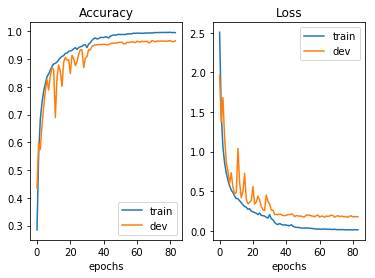

In [95]:
f, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].plot(history.history['acc'], label='train')
ax[0].plot(history.history['val_acc'], label='dev')
ax[0].legend()
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(history.history['loss'], label='train')
ax[1].plot(history.history['val_loss'], label='dev')
ax[1].legend()
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Loss')

## Evaluation

In [3]:
# load best model
model = load_model(save_path)

# load label encoder
le = LabelEncoder()
le.classes_ = np.load('classes.npy')

In [4]:
# load test set
test_path = 'simpsons_testset'
X_test = []
y_test = []
for image_name in os.listdir(test_path):
    image_path = os.path.join(test_path, image_name)
    image_name = re.sub('_[0-9]+', '', image_name[:-4])
    if image_name in le.classes_:        
        image = cv2.imread(image_path)
        image = preprocess_image(image, height, width)
    
        X_test.append(image)
        y_test.append(image_name)
    
X_test = np.array(X_test)
y_test = le.transform(y_test)

In [17]:
# classification report
pred_test = model.predict(X_test)
print(classification_report(y_test, np.argmax(pred_test, axis=1), target_names=le.classes_))

                          precision    recall  f1-score   support

  abraham_grampa_simpson       1.00      0.98      0.99        48
  apu_nahasapeemapetilon       1.00      1.00      1.00        50
            bart_simpson       1.00      1.00      1.00        50
charles_montgomery_burns       0.98      1.00      0.99        48
            chief_wiggum       1.00      1.00      1.00        50
          comic_book_guy       1.00      1.00      1.00        49
          edna_krabappel       1.00      0.96      0.98        50
           homer_simpson       0.91      1.00      0.95        50
           kent_brockman       1.00      0.96      0.98        50
        krusty_the_clown       0.98      1.00      0.99        50
           lenny_leonard       1.00      0.98      0.99        50
            lisa_simpson       1.00      0.98      0.99        50
           marge_simpson       1.00      1.00      1.00        50
     milhouse_van_houten       1.00      1.00      1.00        49
         

([<matplotlib.axis.YTick at 0x2419bf8f940>,
 <a list of 19 Text yticklabel objects>)

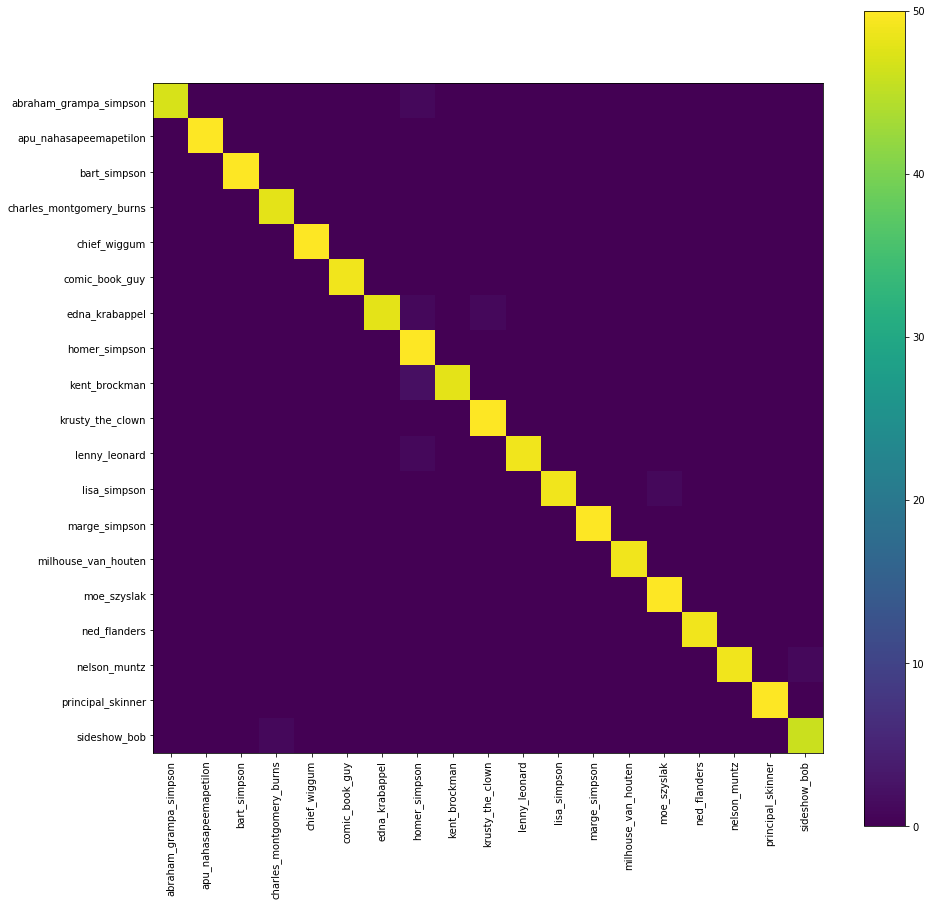

In [87]:
plt.figure(figsize=(15, 15))
cnf_matrix = confusion_matrix(y_test, np.argmax(pred_test, axis=1))
class_names = le.classes_
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

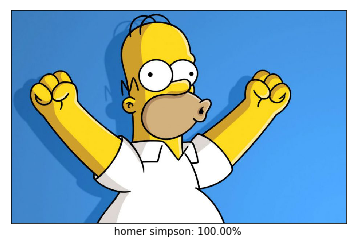

In [125]:
# url = "https://upload.wikimedia.org/wikipedia/en/thumb/a/ac/The_Simpsons%E2%80%93S23.jpg/220px-The_Simpsons%E2%80%93S23.jpg"
url = "https://ksassets.timeincuk.net/wp/uploads/sites/55/2017/03/simpsons-the-great-phatsby-1-920x584.jpg"
plot_and_predict(url, model, le.classes_, height, width)

## Visualization

#### Attention Map

In [5]:
from vis.utils import utils
from vis.visualization import visualize_saliency

<Figure size 432x288 with 0 Axes>

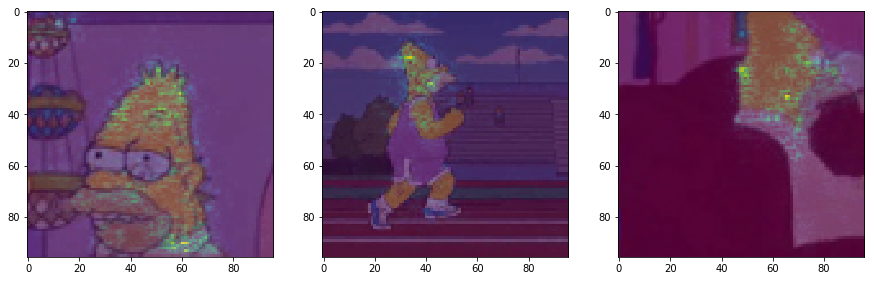

In [9]:
plt.figure()
f, ax = plt.subplots(1, 3, figsize=(15, 5))
model.layers[-1].activations = activations.linear
temp_model = utils.apply_modifications(model)
for i, img in enumerate(X_test[:3]):
    pred_class = np.argmax(model.predict(np.expand_dims(img, axis=0)))
    grads = visualize_saliency(temp_model, -1, pred_class, 
                               img, backprop_modifier=None)
    ax[i].imshow(img[:, :, (2, 1, 0)])
    ax[i].imshow(grads, alpha=0.6)
    
del temp_model

## Video Demo

In [5]:
# load charachter icon
path = 'icon'
icon_list = []
for char_name in os.listdir(path):
    icon_path = os.path.join(path, char_name)
    icon = cv2.imread(icon_path)
    icon = cv2.resize(icon, (48, 48))
    icon_list.append(icon)

In [31]:
video_path = 'video/video1.mp4'
output_path = 'video/output1.mp4'
get_predict_video(video_path, output_path, height, width, model, icon_list, le.classes_)

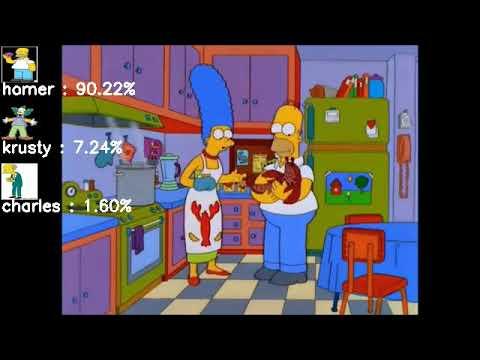

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('myXXcyaSwYk')